In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")
df = pd.read_csv("./UNdata_Export_20210713_093426201.csv")

In [3]:
df.head()

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Female,2000-2005,UNPD_World Population Prospects_2006 (Internat...,Years,42.0,NaN
1,Afghanistan,Female,1995-2000,UNPD_World Population Prospects_2006 (Internat...,Years,42.0,NaN
2,Afghanistan,Female,1990-1995,UNPD_World Population Prospects_2006 (Internat...,Years,42.0,NaN
3,Afghanistan,Female,1985-1990,UNPD_World Population Prospects_2006 (Internat...,Years,41.0,NaN
4,Afghanistan,Male,2000-2005,UNPD_World Population Prospects_2006 (Internat...,Years,42.0,NaN


In [4]:
df.drop("Source", axis=1)
df = df.loc[1:1559]  

In [5]:
grouped=  df.groupby(['Year','Subgroup']) # 연도 구간과 성별에 대해 group화

In [26]:
sum_grouped = grouped["Value"].mean() # 그룹 별 평균 산출
print(sum_grouped)

Year       Subgroup
1985-1990  Female      66.902564
           Male        62.071795
1990-1995  Female      67.902564
           Male        62.933333
1995-2000  Female      68.733333
           Male        63.723077
2000-2005  Female      69.567010
           Male        64.651282
Name: Value, dtype: float64


In [27]:
sum_grouped = pd.DataFrame(sum_grouped) # 기존 sum_grouped의 자료형 - Series -> DataFrame
print(sum_grouped)

                        Value
Year      Subgroup           
1985-1990 Female    66.902564
          Male      62.071795
1990-1995 Female    67.902564
          Male      62.933333
1995-2000 Female    68.733333
          Male      63.723077
2000-2005 Female    69.567010
          Male      64.651282


In [24]:
sum_grouped = sum_grouped.unstack() # 성별에 따라 값을 정렬하기 위해 unstack화
sum_grouped

Value           
Subgroup      Female       Male
Year                           
1985-1990  66.902564  62.071795
1990-1995  67.902564  62.933333
1995-2000  68.733333  63.723077
2000-2005  69.567010  64.651282

In [9]:
# 한글 오류를 방지하기 위한 코드
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family= font_name)

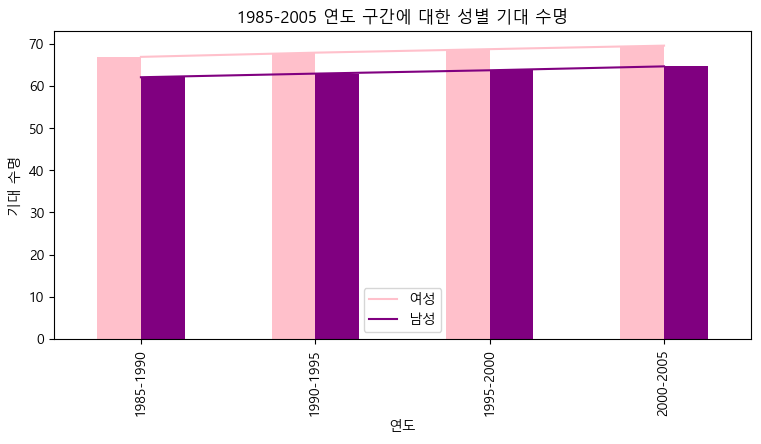

In [15]:
plt.rcParams["figure.figsize"] = [9,4]
sum_grouped.plot(kind='bar',color=['pink','purple']) # barplot 함수 먼저 그리기
plt.plot(sum_grouped.index, sum_grouped[[('Value', 'Female')]],'pink') #여성의 평균기대수명에 대한 추세선 덧그리기
plt.plot(sum_grouped.index, sum_grouped[[('Value', 'Male')]],'purple') # 남성의 평균기대수명에 대한 추세선 덧그리기
plt.xlabel('연도')
plt.ylabel('기대 수명')
plt.legend(labels=['여성','남성'])
plt.title('1985-2005 연도 구간에 대한 성별 기대 수명')

plt.savefig('ML.HW1.png')